# Import Libraries

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import sys
import pandas as pd

if '../../../notebooks/' not in sys.path:
    sys.path.append('../../../notebooks/')

import utils.constants as cts

from models.oface_mouth_model import OpenfaceMouth
from data_loaders.data_loader import DLName
from gt_loaders.gt_names import GTName
from net_trainer import NetworkTrainer, BaseModel, Optimizer

# Start Network Trainer

In [5]:
kwargs = { 
    'use_neptune': False,
    'exp_params' : {
        'name': 'train_vgg16',
        'description': 'Training mtl network for mouth and veil requisites',
        'tags': ['vgg16', 'ground truths', 'adagrad', 'veil', 'mouth'],
        'src_files': ['net_trainer.py']
    },
    'properties': {
#         'tagger_model': OpenfaceMouth(),
#         'dl_names': {'train_validation':
#                            [DLName.VGGFACE2, DLName.CALTECH, DLName.FVC_PYBOSSA, 
#                             DLName.CVL, DLName.FEI_DB, DLName.GEORGIA_TECH, DLName.COLOR_FERET,
#                             DLName.ICPR04, DLName.IMFDB, DLName.IJBC, DLName.LFW, DLName.CASIA_WF,
#                             DLName.GENKI4K_DB],
#                       'test': [],
        'reqs': [cts.ICAO_REQ.MOUTH, cts.ICAO_REQ.VEIL],
        'aligned': True,
        'use_gt_data': True,
        'gt_names': {
            'train_validation': [],
            'test': [],
            'train_validation_test': [GTName.FVC, GTName.GENKI, GTName.IMFD, GTName.CMFD, GTName.IM_SEARCH]
        },
        'balance_input_data': False,
        'save_trained_model': False
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 64,
        'n_epochs': 10,
        'early_stopping': 10,
        'shuffle': True,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAGRAD,
        'train_prop': 0.9,
        'validation_prop': 0.05,
        'test_prop': 0.05,
        'seed': 42,
        'validation_split': 0.1,
        'dropout': 0.3
    }
}

trainer = NetworkTrainer(**kwargs)

-----
Use Neptune:  False
-----
Args: 
{'exp_params': {'description': 'Training mtl network for mouth and veil '
                               'requisites',
                'name': 'train_vgg16',
                'src_files': ['net_trainer.py'],
                'tags': ['vgg16', 'ground truths', 'adagrad', 'veil', 'mouth']},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f7b99b1edc0>}>,
                      'batch_size': 64,
                      'dropout': 0.3,
                      'early_stopping': 10,
                      'learning_rate': 0.001,
                      'n_epochs': 10,
                      'optimizer': <Optimizer.ADAGRAD: 'Adagrad'>,
                      'seed': 42,
                      'shuffle': True,
                      'test_prop': 0.05,
                      'train_prop': 0.9,
                      'validation_prop': 0.05,
                      'validation_split': 0.1},
 '

# Load Data

In [6]:
trainer.load_training_data()

Loading data
Loading GT FVC...
..Ignoring 19 empty label values
Loading GT GENKI...
..Ignoring 0 empty label values
Loading GT IMFD...
..Ignoring 0 empty label values
Loading GT CMFD...
..Ignoring 0 empty label values
Loading GT IM_SEARCH...
..Ignoring 0 empty label values
Input data.shape: (13060, 5)
Data loaded


In [10]:
trainer.train_data[trainer.train_data.origin == 'fvc'].veil.nunique()

2

# Data Balancing

In [5]:
trainer.balance_input_data()

Not balancing input_data


# Data Generators

In [6]:
trainer.setup_data_generators()

Starting data generators
Found 11167 validated image filenames.
Found 1240 validated image filenames.
Found 653 validated image filenames.
TOTAL: 13060


# Labels Distribution

In [7]:
trainer.summary_labels_dist()

Requisite: MOUTH
N_TRAIN_VALID_COMP: 5769 (46.5%)
N_TRAIN_VALID_NOT_COMP: 3493 (28.15%)
N_TRAIN_VALID_DUMMY: 3145 (25.35%)
N_TEST_COMP: 305 (46.71%)
N_TEST_NOT_COMP: 184 (28.18%)
N_TEST_DUMMY: 164 (25.11%)
----
Requisite: VEIL
N_TRAIN_VALID_COMP: 8916 (71.86%)
N_TRAIN_VALID_NOT_COMP: 3491 (28.14%)
N_TRAIN_VALID_DUMMY: 0 (0.0%)
N_TEST_COMP: 471 (72.13%)
N_TEST_NOT_COMP: 182 (27.87%)
N_TEST_DUMMY: 0 (0.0%)
----


In [8]:
trainer.train_gen.labels[0]

array([1., 0., 1., ..., 2., 0., 1.])

In [9]:
import tensorflow as tf

y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# Using 'auto'/'sum_over_batch_size' reduction type.  
scce = tf.keras.losses.SparseCategoricalCrossentropy()
scce(y_true, y_pred).numpy()

1.1769392

<AxesSubplot:>

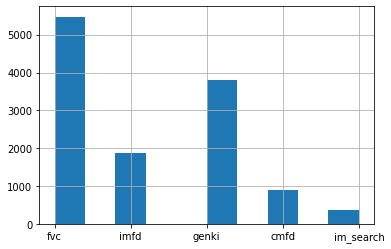

In [10]:
trainer.train_data.origin.hist()

In [11]:
trainer.train_data.dtypes

origin       object
img_name     object
mouth       float64
veil        float64
aligned      object
dtype: object

# Use Neptune

In [12]:
trainer.start_neptune()
trainer.create_experiment()

Not using Neptune
Not using Neptune


# Create Model

In [13]:
trainer.create_model()

Creating model...
Model created


# Vizualize Model

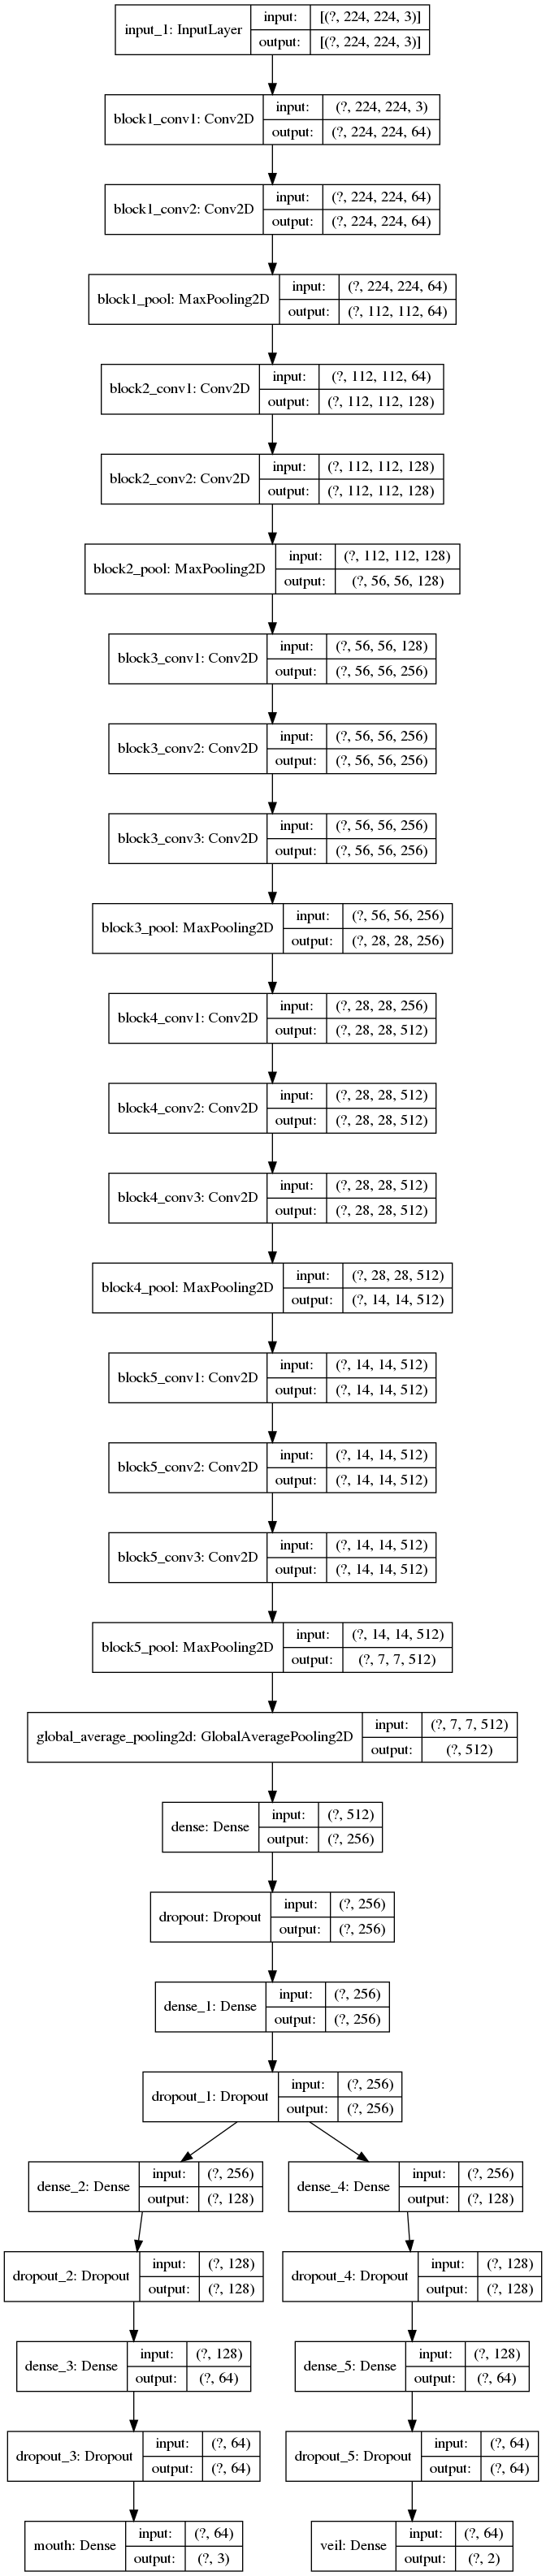

In [15]:
trainer.vizualize_model()

# Training Model

In [14]:
trainer.train_model()

Training VGG16 network
Epoch 1/10
 14/174 [=>............................] - ETA: 4:45 - loss: 0.3988 - mouth_loss: 1.0985 - veil_loss: 0.6930 - mouth_accuracy: 0.4408 - veil_accuracy: 0.6842

KeyboardInterrupt: 

# Plots

In [ ]:
trainer.draw_training_history()

# Load Best Model

In [ ]:
trainer.load_best_model()

# Saving Trained Model

In [ ]:
trainer.save_model()

# Test Trained Model

In [15]:
trainer.test_model()

Testing Trained Model
Requisite: MOUTH
              precision    recall  f1-score   support

    NON_COMP       0.00      0.00      0.00        66
        COMP       0.77      1.00      0.87       222

    accuracy                           0.77       288
   macro avg       0.39      0.50      0.44       288
weighted avg       0.59      0.77      0.67       288

Model Accuracy: 0.7708
Requisite: VEIL
              precision    recall  f1-score   support

    NON_COMP       0.06      1.00      0.11        17
        COMP       0.00      0.00      0.00       271

    accuracy                           0.06       288
   macro avg       0.03      0.50      0.06       288
weighted avg       0.00      0.06      0.01       288

Model Accuracy: 0.059


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Evaluate Model

In [ ]:
trainer.evaluate_model()

# Vizualize Model Classification

In [ ]:
trainer.vizualize_predictions()

# Finishing Experiment Manager

In [ ]:
trainer.finish_experiment()